In [25]:
%load_ext autoreload 
%autoreload 2

import os
import math
import numpy as np
import pandas as pd
from numpy import array
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
from scipy import signal
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import importlib
import model as md
import view as vw

importlib.reload(md)
importlib.reload(vw)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<module 'view' from 'c:\\Users\\Артем\\Desktop\\Вуз\\Аспирантура\\Диссертация\\Алгоритм\\Relaxation_frequency_phase_algorithm\\view\\__init__.py'>

In [26]:
dir = os.getcwd()
U_path = os.path.join(dir, "data","real", "RTB2004_CHAN1.csv")
I_path= os.path.join(dir, "data","real", "RTB2004_CHAN2.csv")

t,U = md.make_real_data_list(U_path)
t,I = md.make_real_data_list(I_path)

In [27]:
F,V = md.get_spectrum3(t,U)
F_peak_calc = F[np.argmax(V)]
T=1/F_peak_calc

T_counts=md.convert_to_counts(t,T)
window=T_counts*8

fs = 1 / np.mean(np.diff(t))
 
vw.show_I_U_3(t,I,U,0,window)


In [28]:
t_f, U_f=md.filter_elliptic_bandpass  (t,U,F_peak_calc,200e3,2)
t_f, I_f=md.filter_elliptic_bandpass(t,I,F_peak_calc,200e3,2)

vw.show_I_U_3(t_f,I_f, U_f,0,window)

In [29]:
time_maxpoint,phase_maxpoint=md.get_phase_maxpoint_diff(t_f,U_f,I_f,F_peak_calc)
vw.show_one_graph(time_maxpoint,phase_maxpoint)


In [30]:
F_peak_calc

np.float64(444444.44444444444)

75000


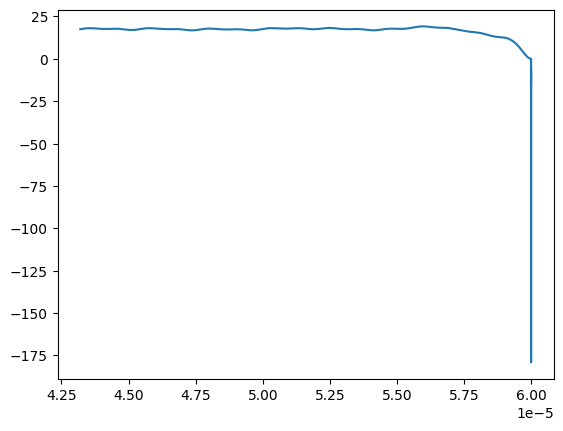

In [31]:
time_hilbert, phase_hilbert=md.get_phase_hilbert(t_f, U_f, I_f, fs)
print(len(phase_hilbert))
vw.plot(time_hilbert, phase_hilbert,None,48000)

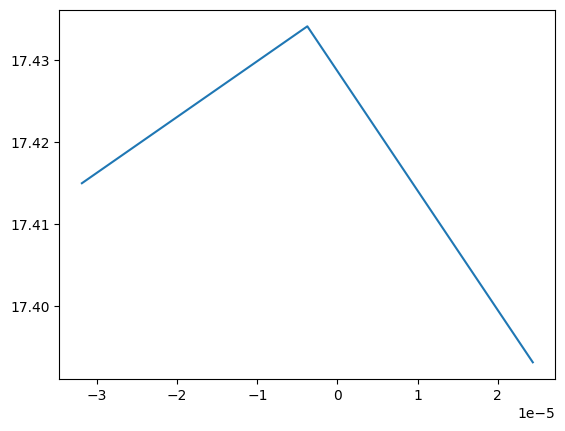

In [32]:
time_FFT, phase_FFT = md.get_phase_FFT(t_f,U_f, I_f, F_peak_calc, n_periods=25, overlap=0.5)
plt.plot(time_FFT, phase_FFT)

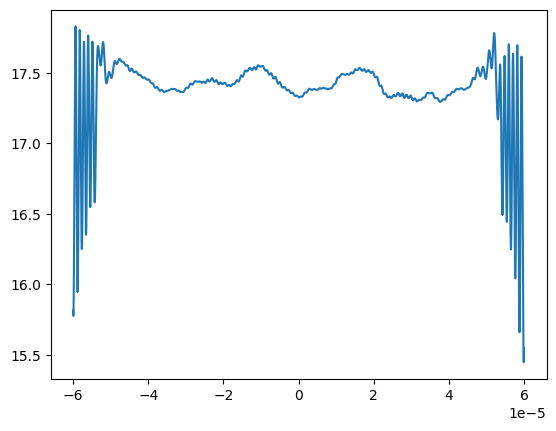

In [33]:
time_lockin, phase_lockin = md.get_phase_lockin(t_f,U_f, I_f, F_peak_calc,5)
plt.plot(time_lockin,phase_lockin)

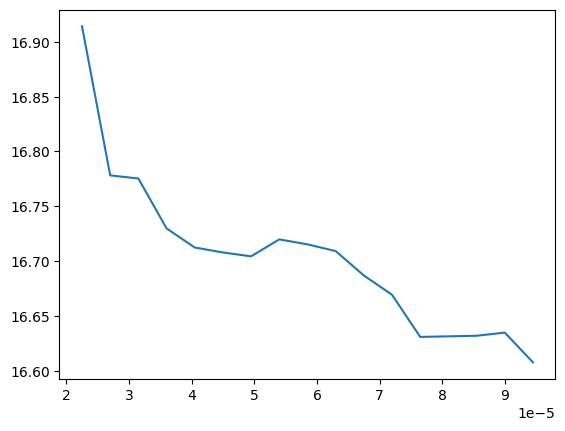

In [34]:
time_xcorr,phasse_xcorr = md.get_phase_xcorr2(t_f,U_f, I_f, F_peak_calc,20,0.9)
plt.plot(time_xcorr,phasse_xcorr)

In [35]:
phase=md.get_phase_RC_real(F_peak_calc,128.35,869.67e-12)
F_rel=md.get_F_rel(phase,F_peak_calc)
print(phase)
print(format(F_rel, ".2e"))

17.31266541423264
1.43e+06


In [36]:
md.print_full_stats(F_peak_calc, phase_maxpoint,phase_hilbert,phase_FFT,phase_lockin,phasse_xcorr)

Array 1: Mean phase = 10.1711, KDE mode phase = 16.7305
Array 1: Mean Frel = 2477291.8791, KDE mode Frel = 1478553.6704
Array 2: Mean phase = 17.2739, KDE mode phase = 17.4357
Array 2: Mean Frel = 1429235.8106, KDE mode Frel = 1415133.7403
Array 3: Mean phase = 17.4141, KDE mode phase = 17.4163
Array 3: Mean Frel = 1417004.3495, KDE mode Frel = 1416814.1042
Array 4: Mean phase = 17.3764, KDE mode phase = 17.3802
Array 4: Mean Frel = 1420271.6530, KDE mode Frel = 1419941.8221
Array 5: Mean phase = 16.7037, KDE mode phase = 16.7000
Array 5: Mean Frel = 1481060.4245, KDE mode Frel = 1481412.7175
